**Importing Libraries**

In [ ]:
!pip install joblib


In [ ]:
!pip install sklearn-extensions

In [ ]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression

#For model/vatiable persistence

#For math operations
import math

#To see the progress of the iterations
import joblib
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

**Data Analysis**

In [ ]:
df = pd.read_csv('weatherAUS.csv')

print("Total no.of points = {}".format(data.shape[0]))
df.head(5)

Total no.of points = 142193


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
print(df.shape)

(142193, 24)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool

We can see there are many Null values in the data , lets try to fill with proper values

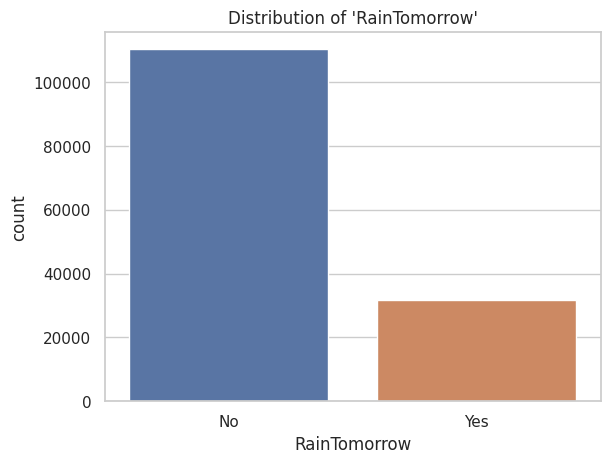

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x='RainTomorrow', data=df)
plt.title("Distribution of 'RainTomorrow'")
plt.show()

From above plot it is clear that data set is imbalanced

In [ ]:
data_yes = df[df['RainTomorrow']=='Yes']
data_no = df[df['RainTomorrow']=='No']

Now lets observe the most occuring values in every column for both the cases

In [ ]:
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2010-09-03,Portland,9.6,17.2,0.0,4.0,0.0,W,39.0,N,...,69.0,1014.0,1010.4,8.0,8.0,13.8,16.0,No,1.2,Yes


In [ ]:
mode_values_for_no = data_no.mode()
mode_values_for_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2014-03-18,Canberra,11.0,20.0,0.0,4.0,11.0,E,35.0,N,...,52.0,1017.9,1015.5,1.0,1.0,16.0,20.0,No,0.0,No


In [ ]:
data_no['MaxTemp'].median()

23.3

In [ ]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [ ]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [ ]:
data_filled= data_yes.append(data_no, ignore_index=True)

In [ ]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [ ]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(df))))

Percentage of removed points= 60.14642070988023%


In [ ]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')

In [ ]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction
data_final = data_filled.drop(['Date', 'Location','RISK_MM'], axis=1)

In [ ]:
data_final.shape

(56669, 21)

Now lets check for any outliers

<Axes: >

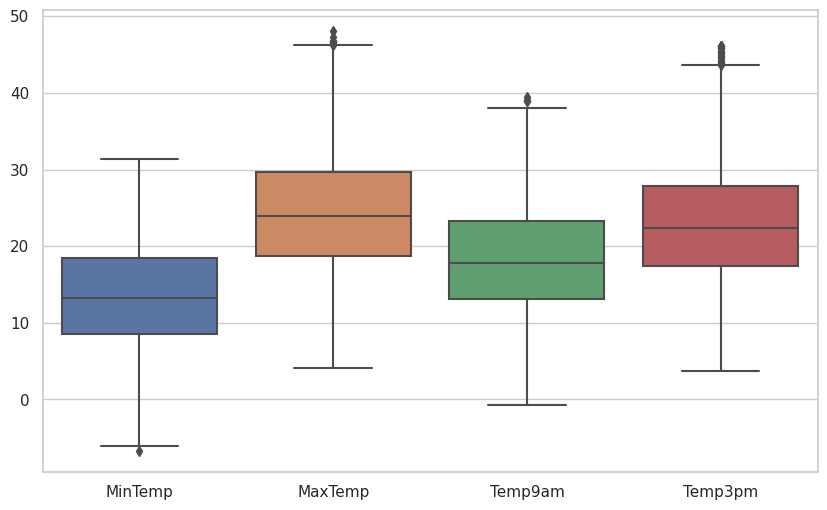

In [ ]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

From the above box plot we can see that all temparature values are meaningfull, no outliers found here

<Axes: >

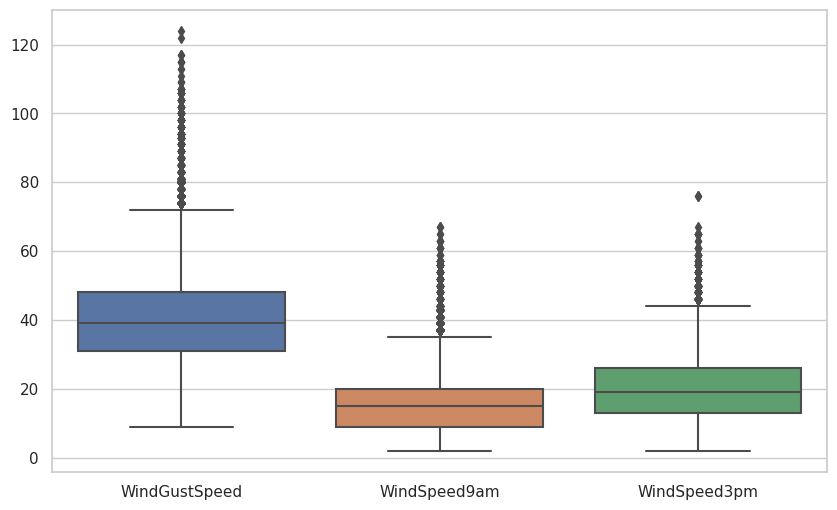

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

All wind speed values also are in sensible ranges

<Axes: >

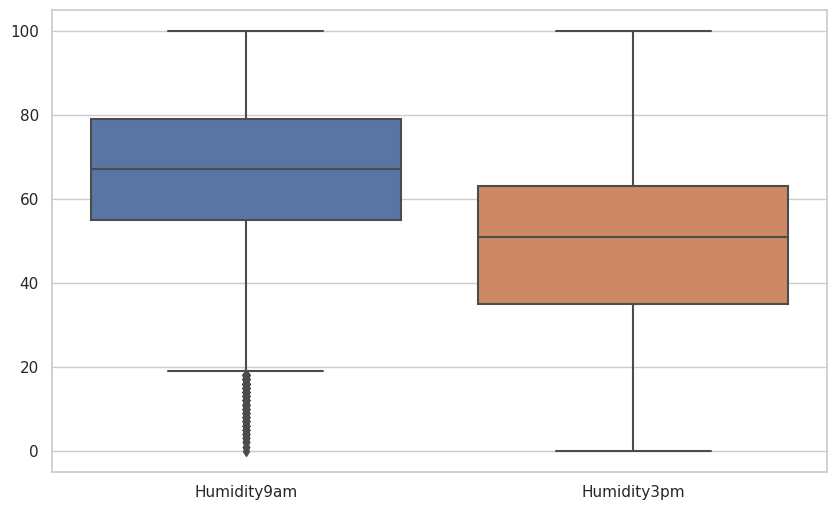

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

As we can see that there are some humidity values =0% which is almost never possible, hence removing 0 values

In [ ]:
data_final= data_final[data_final['Humidity3pm']!=0.0]
data_final= data_final[data_final['Humidity9am']!=0.0]

<Axes: >

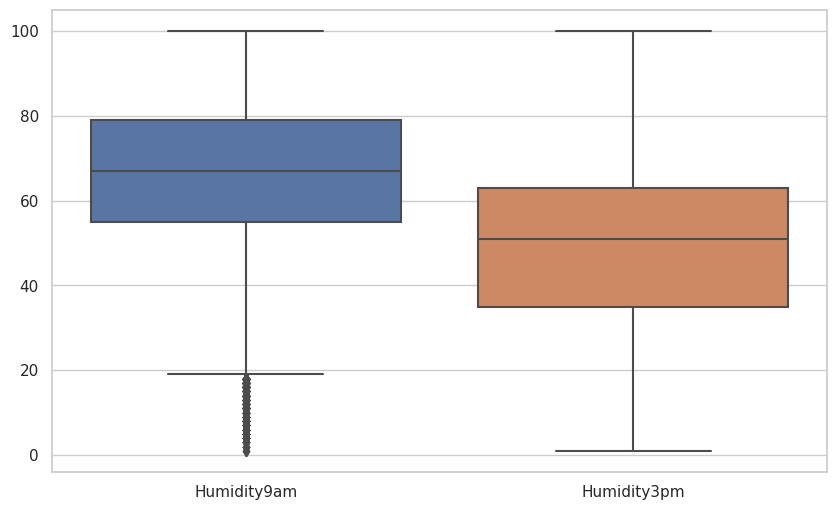

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

<Axes: >

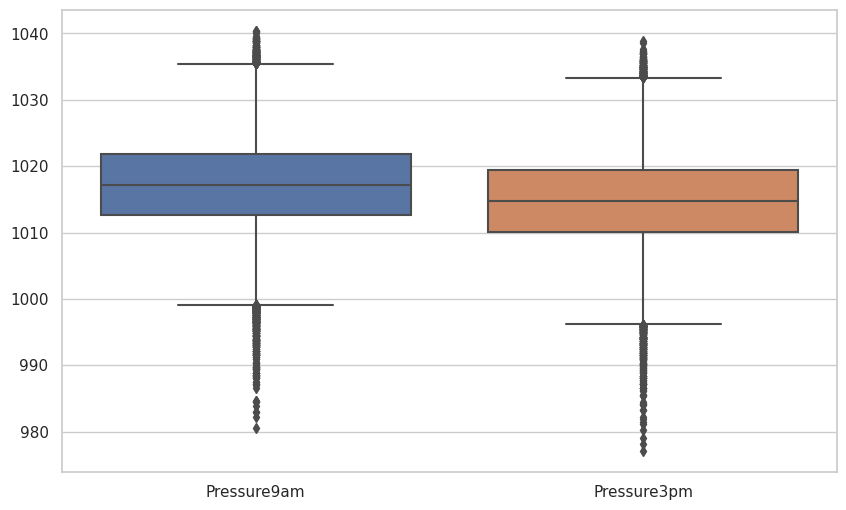

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Pressure9am','Pressure3pm']])

Here also there are no outliers, all pressure ranges also normally can happen in nature

<Axes: >

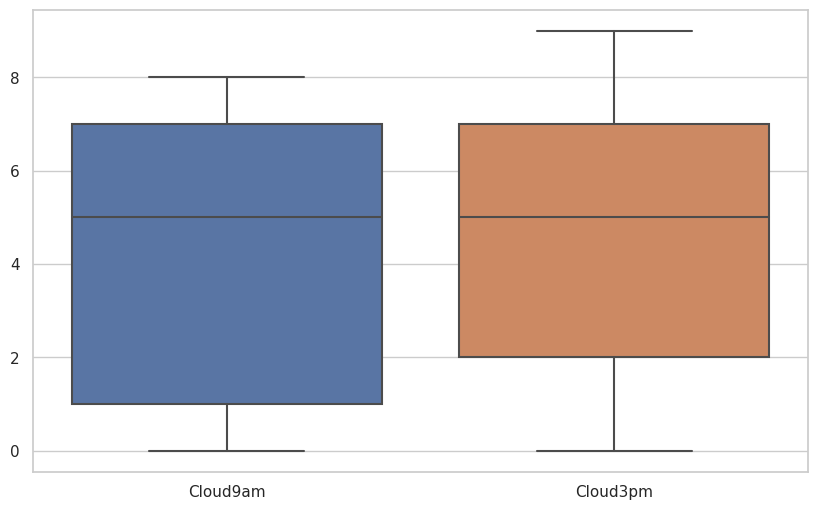

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Cloud9am','Cloud3pm']])

<Axes: >

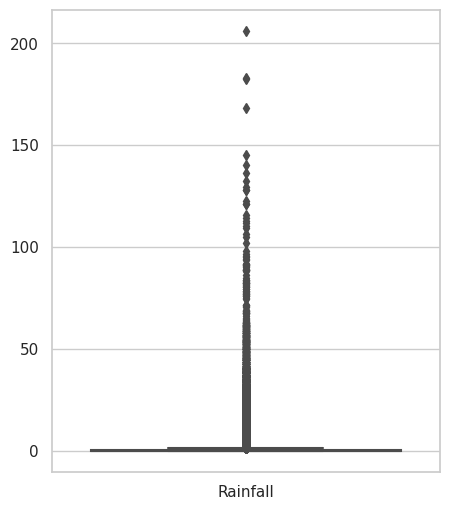

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Rainfall']])

<Axes: >

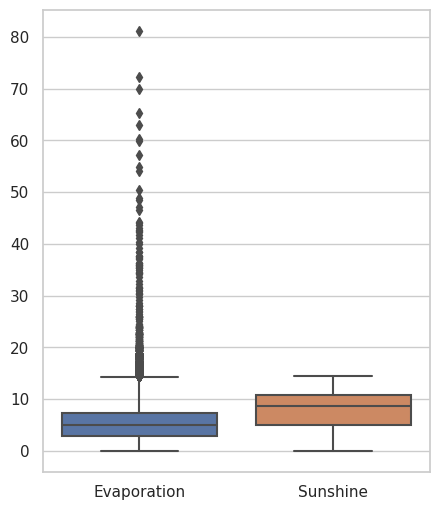

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Evaporation','Sunshine']])

Hence the data is not suffering from outliers

**Data pre-processing**

Encoding the categorical variables above into values

In [ ]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [ ]:
Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [ ]:
column_names=X.columns.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

Since the features are measured from different scales, appling featuring scaling

In [ ]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def plotErrors(k,train,cv):

    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

**Modeling the data using Logisitic Regression**

Hyper-parameter tuning

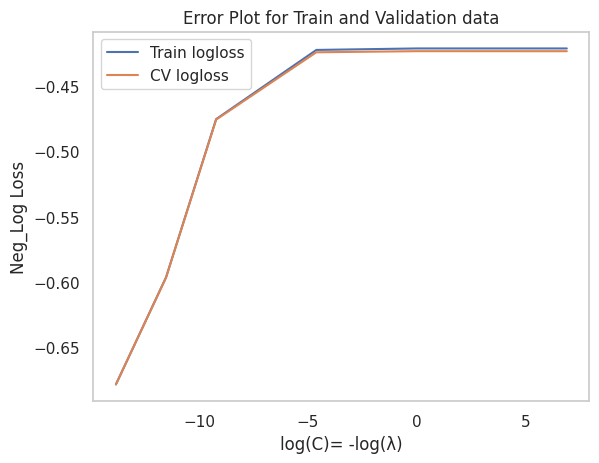

In [ ]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score']

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [ ]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced')

In [ ]:
#Trainig with the best value of C
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

**Model Evaluating**

In [ ]:
#Printing the log-loss for both train and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.4213637502330669
Log_loss on test data is :0.42841877762531966


Since log-loss can have any value between [0, ∞] so we can only interpret the model prefectly fitted or not but we cannot tell how best the model is, hence checking with AUC metric

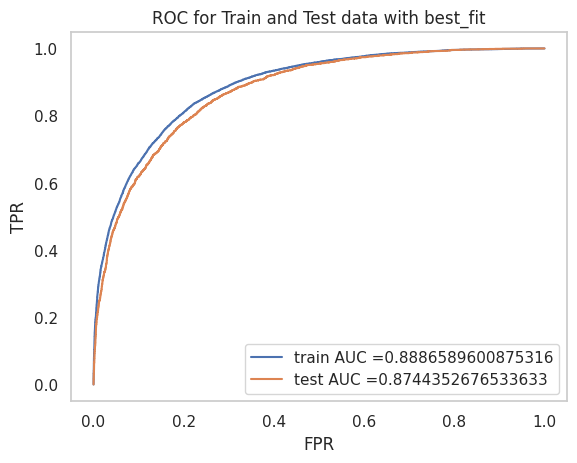

In [ ]:
#Plotting AUC
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

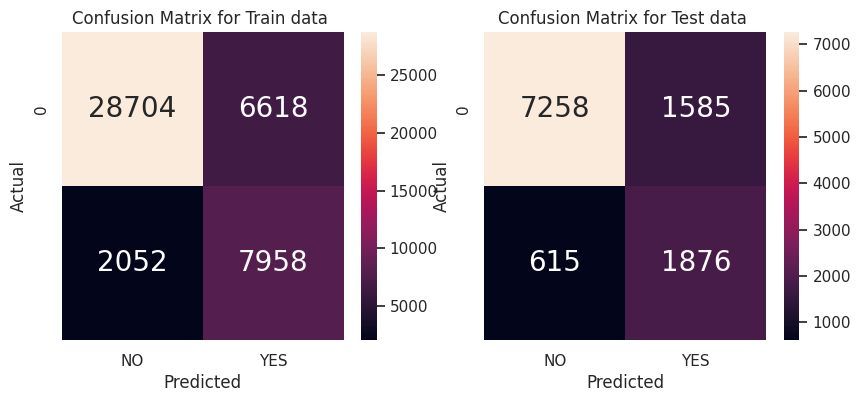

In [ ]:
#ploting Confusion matrix
#Ref:https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
def plotcm (cm,ax,title):
    sns.heatmap(cm, ax=ax,annot=True,fmt='d',annot_kws={'size':20},yticklabels=3);
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual');
    ax.set_title('Confusion Matrix for {} '.format(title));
    ax.xaxis.set_ticklabels(['NO', 'YES']);
    #ax.yaxis.set_ticklabels(['NO', 'YES']);


fig, subplt = plt.subplots(1, 2,figsize=(10, 4))
cm=confusion_matrix(y_train, clf.predict(X_train))
ax= subplt[0]
plotcm(cm,ax,'Train data')

cm=confusion_matrix(y_test, clf.predict(X_test))
ax= subplt[1]
plotcm(cm,ax,'Test data')

**Feature interpretation**

In [ ]:
clf.coef_[0]

array([-0.272718  , -0.01888115,  0.10988243, -0.06915256, -0.62728539,
        0.12245798,  0.84953389, -0.03214127, -0.03536307, -0.09534929,
       -0.24119127,  0.06394845,  1.1370843 ,  0.99791459, -1.41556721,
       -0.09055778,  0.30180472,  0.26363375,  0.12924531,  0.17698128])

In [ ]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [ ]:
feature_weights

[(1.1370843016939374, 'Humidity3pm'),
 (0.9979145915734955, 'Pressure9am'),
 (0.8495338941313112, 'WindGustSpeed'),
 (0.3018047151297412, 'Cloud3pm'),
 (0.2636337480671125, 'Temp9am'),
 (0.17698127689999843, 'RainToday'),
 (0.12924531106396575, 'Temp3pm'),
 (0.12245797500558965, 'WindGustDir'),
 (0.10988243260771245, 'Rainfall'),
 (0.06394844711638073, 'Humidity9am'),
 (-0.018881148455341695, 'MaxTemp'),
 (-0.032141265670996795, 'WindDir9am'),
 (-0.03536307190873868, 'WindDir3pm'),
 (-0.06915256258015891, 'Evaporation'),
 (-0.09055778189807435, 'Cloud9am'),
 (-0.0953492851342195, 'WindSpeed9am'),
 (-0.24119127018123354, 'WindSpeed3pm'),
 (-0.27271800233850396, 'MinTemp'),
 (-0.6272853899640596, 'Sunshine'),
 (-1.4155672106223933, 'Pressure3pm')]

This is our weight vector, each weight corresponds to each feature, above are the sorted features based on its weight value. Higher weight value means higher important feature it is.

In [ ]:
def will_rain_fall_for_this_conditions(xq):

    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed))

In [ ]:
MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 57
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   ="Yes"

In [ ]:
point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

**Interpretting the Classifer result**

In [ ]:
will_rain_fall_for_this_conditions(xq)

Yes, there is a [99.04083842] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for rainfall
